In [1]:
import mbuild as mb
import antefoyer
import numpy as np
import foyer
import parmed as pmd
import copy
from atools.lib.chains import Alkylsilane
from atools.recipes import DualSurface, SilicaInterface, SurfaceMonolayer
from atools.lib.chains.alkylsilane_internal import Alkylsilane as AlkylsilaneInternal
from mbuild.lib.atoms import H
from mbuild.formats.lammpsdata import write_lammpsdata
from foyer import Forcefield
from foyer import forcefield
from foyer.atomtyper import find_atomtypes
import simtk.openmm.app.element as elem
import foyer.element as custom_elem
import simtk.unit as u
from simtk import openmm as mm
from simtk.openmm import app
from simtk.openmm.app.forcefield import (NoCutoff, CutoffNonPeriodic, HBonds, AllBonds, HAngles, NonbondedGenerator, _convertParameterToNumber)
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 

Short Chain

In [3]:
length = 5; terminal_group = 'triazole'; backbone = 'methylene'; 
locations = [2]

cpa = AlkylsilaneInternal(chain_length=length, internal_group=backbone, locations=locations, terminal_group=terminal_group)
cpa.visualize()
structure = cpa.to_parmed(box=None, residues=['chain'])
ff = Forcefield(forcefield_files='oplsaa-july-29.xml')

structure_ = ff.apply(structure,verbose=True)

# structure_.save('{}-nov-28.top'.format(terminal_group),overwrite=True)

Missing bonds: [<Bond <Atom C [22]; In RES 0>--<Atom H [26]; In RES 0>; type=None>, <Bond <Atom C [23]; In RES 0>--<Atom H [25]; In RES 0>; type=None>]
Missing angle with ids (20, 21, 23) and types ['opls_548', 'opls_549', 'opls_558B'].
Missing angle with ids (20, 22, 26) and types ['opls_548', 'opls_558B', 'opls_144'].
Missing angle with ids (21, 23, 24) and types ['opls_549', 'opls_558B', 'opls_520B'].
Missing angle with ids (21, 23, 25) and types ['opls_549', 'opls_558B', 'opls_144'].
Missing angle with ids (22, 24, 23) and types ['opls_558B', 'opls_520B', 'opls_558B'].
Missing angle with ids (24, 22, 26) and types ['opls_520B', 'opls_558B', 'opls_144'].
Missing angle with ids (24, 23, 25) and types ['opls_520B', 'opls_558B', 'opls_144'].
Missing dihedral with ids (14, 17, 20, 21) and types ['opls_136', 'opls_245B', 'opls_548', 'opls_549'].
Missing dihedral with ids (15, 14, 17, 20) and types ['opls_140', 'opls_136', 'opls_245B', 'opls_548'].
Missing dihedral with ids (16, 14, 17, 2

548 549 558B
NA. NB. CR. 
548 558B 144
NA. CR.  HC.
549 558B 520B
NB. CR.  NB. 

In [12]:
cpa.visualize()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [29]:
cpa.get_smiles()

'[Si](O)(O)CCn1ncnc1'

Dual monolayer with short chains

In [5]:
length = 17; seed = 12345; pattern_type = "random"; terminal_group = 'benzoicacid'; fraction = 0.5; num_chains = 1; backbone = 'methylene'; locations = [2,5,8,11,14]

cpa = AlkylsilaneInternal(chain_length=length, internal_group=backbone, locations=locations, terminal_group=terminal_group);
cpb = AlkylsilaneInternal(chain_length=length, internal_group=backbone, locations=locations, terminal_group=terminal_group);
cpc = AlkylsilaneInternal(chain_length=length, internal_group=backbone, locations=locations, terminal_group=terminal_group);
cpd = AlkylsilaneInternal(chain_length=length, internal_group=backbone, locations=locations, terminal_group=terminal_group);

surface_a = SilicaInterface(thickness=1.2, seed=seed)
surface_b = SilicaInterface(thickness=1.2, seed=seed)

monolayer_a = SurfaceMonolayer(surface=surface_a, chains=[cpa,cpb], n_chains=num_chains, seed=seed, backfill=H(), rotate=False, fractions=[fraction, 1-fraction]);
monolayer_a.name = "Bottom"
        
monolayer_b = SurfaceMonolayer(surface=surface_b, chains=[cpc,cpd], n_chains=num_chains, seed=seed, backfill=H(), rotate=False, fractions=[fraction, 1-fraction]);
monolayer_b.name = "Top"

dual_monolayer = DualSurface(bottom=monolayer_a, top=monolayer_b, separation=2.0);
box = dual_monolayer.boundingbox; dual_monolayer.periodicity += np.array([0, 0, 5.0 * box.lengths[2]])

for p in dual_monolayer.particles():
    if p.name == "OS":
        p.name = "O"

structure = dual_monolayer.to_parmed(box=None, residues=["Top", "Bottom"])
ff = Forcefield(forcefield_files='oplsaa-july-29.xml')
structure = ff.apply(structure,verbose=True)

In [6]:
structure.save('{}-system.top'.format(terminal_group), overwrite=True)

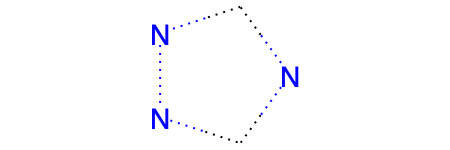

In [58]:
substructure = Chem.MolFromSmarts(
    '[N;X2;r5]1[C;X3;r5][N;X2;r5][N;X3;r5][C;X3;r5]1'
    )
substructure

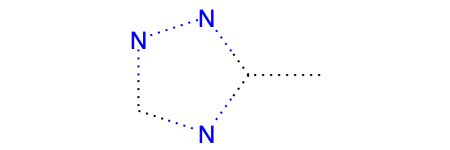

In [33]:
substructure = Chem.MolFromSmarts(
     '[C;X3;r5]1[N;X3;r5][N;X2;r5][C;X3;r5][N;X2;r5]1'
    )
substructure

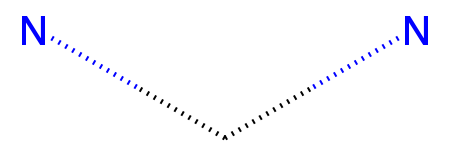

In [30]:
substructure = Chem.MolFromSmarts(
"C(N)N"    )
substructure

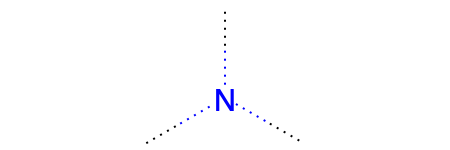

In [85]:
substructure = Chem.MolFromSmarts(
    '[C][N;X3](C)(C)'
    )
substructure